In [419]:
import tensorflow as tf
from tensorflow import keras
from random import shuffle
import numpy as np
import csv

In [420]:
dict = {
    0: "Rock",
    1: "Paper",
    2: "Scissors"
}

In [474]:
player_sequences = []
computer_sequences = []
win_data = []

labels = []

maxlen = 4
split = 0.7

with open('../data/collected.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)

    next(reader)

    for row in reader:
        inputs = [int(char) for char in row[2]]
        for i in range(1, len(inputs)+1):
            player_sequences.append(inputs[:i+1])
        inputs = [int(char) for char in row[4]]
        for i in range(1, len(inputs)+1):
            computer_sequences.append(inputs[:i+1])
        inputs = [(lambda x : 1 if x=='w' else (0 if x=='t' else -1))(char) for char in row[3]]
        for i in range(1, len(inputs)+1):
            win_data.append(inputs[:i+1])

# s = '2002120021200212002120021200212002120021200212002120021200212002120021200212002120021200212002120021'
# input = [int(i) for i in s]
# for i in range(1, len(input)+1):
#     player_sequences.append(input[:i+1])


In [475]:
np.shape(player_sequences), np.shape(computer_sequences), np.shape(win_data)

C:\Users\mahaj\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


((646,), (646,), (646,))

In [476]:
player_sequences = list(filter(lambda x : len(x) >= maxlen+1,player_sequences))
computer_sequences = list(filter(lambda x : len(x) >= maxlen+1, computer_sequences))
win_data = list(filter(lambda x : len(x) >= maxlen+1, win_data))

In [477]:
player_sequences = list(map(lambda x: x[-maxlen-1:], player_sequences))
computer_sequences = list(map(lambda x: x[-maxlen-1:], computer_sequences))
win_data = list(map(lambda x: x[-maxlen-1:], win_data))

In [478]:
player_sequences[:5], computer_sequences[:5], win_data[:5]

([[3, 2, 2, 2, 2],
  [2, 2, 2, 2, 2],
  [2, 2, 2, 2, 2],
  [2, 2, 2, 2, 1],
  [2, 2, 2, 1, 1]],
 [[2, 2, 2, 2, 2],
  [2, 2, 2, 2, 2],
  [2, 2, 2, 2, 1],
  [2, 2, 2, 1, 2],
  [2, 2, 1, 2, 3]],
 [[1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1],
  [0, 0, 0, 1, -1],
  [0, 0, 1, -1, 1]])

In [479]:
player_sequences, computer_sequences, win_data = np.array(player_sequences), np.array(computer_sequences), np.array(win_data)

In [480]:
player_inputs, labels = player_sequences[:,:-1], player_sequences[:,-1]
computer_inputs = computer_sequences[:,:-1]
win_inputs = win_data[:,:-1]

In [481]:
np.shape(player_inputs), np.shape(computer_inputs), np.shape(win_inputs)

((628, 4), (628, 4), (628, 4))

In [482]:
player_inputs[:5], computer_inputs[:5], win_inputs[:5]

(array([[3, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 1]]),
 array([[2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 1],
        [2, 2, 1, 2]]),
 array([[ 1,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  1],
        [ 0,  0,  1, -1]]))

In [483]:
inputs = np.stack((player_inputs, computer_inputs), axis=1)
input_dim = 2

In [484]:
inputs = inputs-1
labels = labels-1

inputs = inputs /2 
inputs

array([[[1. , 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5]],

       [[0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5]],

       [[0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5]],

       ...,

       [[1. , 0.5, 0.5, 0. ],
        [0.5, 0. , 1. , 1. ]],

       [[0.5, 0.5, 0. , 0. ],
        [0. , 1. , 1. , 1. ]],

       [[0.5, 0.5, 0. , 0. ],
        [0. , 1. , 1. , 1. ]]])

In [485]:
inputs[:5], labels[:5]

(array([[[1. , 0.5, 0.5, 0.5],
         [0.5, 0.5, 0.5, 0.5]],
 
        [[0.5, 0.5, 0.5, 0.5],
         [0.5, 0.5, 0.5, 0.5]],
 
        [[0.5, 0.5, 0.5, 0.5],
         [0.5, 0.5, 0.5, 0.5]],
 
        [[0.5, 0.5, 0.5, 0.5],
         [0.5, 0.5, 0.5, 0. ]],
 
        [[0.5, 0.5, 0.5, 0. ],
         [0.5, 0.5, 0. , 0.5]]]),
 array([1, 1, 1, 0, 0]))

In [486]:
# np.shape(player_sequences), labels

In [487]:
train_size = int(split * len(inputs))
valid_size = int(((1+split)/2) * len(inputs))

training_data, training_labels = inputs[:train_size], labels[:train_size]
valid_data, valid_labels = inputs[train_size:valid_size], labels[train_size:valid_size]
test_data, test_labels = inputs[valid_size:], labels[valid_size:]

In [488]:
print(f"Training data: {training_data.shape}, {training_labels.shape}")
print(f"Validation data: {valid_data.shape}, {valid_labels.shape}")
print(f"Test data: {test_data.shape}, {test_labels.shape}")

Training data: (439, 2, 4), (439,)
Validation data: (94, 2, 4), (94,)
Test data: (95, 2, 4), (95,)


In [489]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, input_shape=(input_dim, maxlen)),
    # tf.keras.layers.LSTM(100),
    
    # tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [490]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [491]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [492]:
history = model.fit(training_data, training_labels, epochs=200, batch_size=16, verbose=1, shuffle=True, validation_data=(valid_data, valid_labels))

Epoch 1/200
28/28 [==============================] - 9s 89ms/step - loss: 1.0975 - accuracy: 0.3759 - val_loss: 1.0999 - val_accuracy: 0.2872
Epoch 2/200
28/28 [==============================] - 0s 17ms/step - loss: 1.0973 - accuracy: 0.3554 - val_loss: 1.1003 - val_accuracy: 0.2660
Epoch 3/200
28/28 [==============================] - 0s 16ms/step - loss: 1.0973 - accuracy: 0.3485 - val_loss: 1.1003 - val_accuracy: 0.2660
Epoch 4/200
28/28 [==============================] - 0s 12ms/step - loss: 1.0970 - accuracy: 0.3645 - val_loss: 1.1002 - val_accuracy: 0.2553
Epoch 5/200
28/28 [==============================] - 0s 11ms/step - loss: 1.0969 - accuracy: 0.3690 - val_loss: 1.1003 - val_accuracy: 0.2553
Epoch 6/200
28/28 [==============================] - 0s 13ms/step - loss: 1.0968 - accuracy: 0.3736 - val_loss: 1.0999 - val_accuracy: 0.2553
Epoch 7/200
28/28 [==============================] - 0s 12ms/step - loss: 1.0967 - accuracy: 0.3872 - val_loss: 1.1001 - val_accuracy: 0.2553
Epoch 

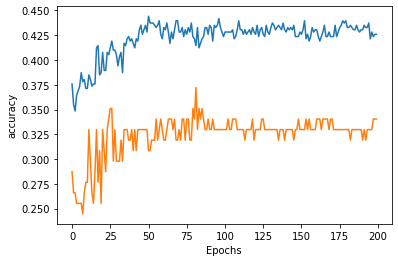

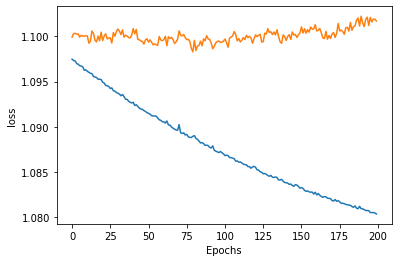

In [493]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [495]:
model.evaluate(test_data, test_labels)

3/3 [==============================] - 0s 15ms/step - loss: 1.1033 - accuracy: 0.2842


[1.1032726764678955, 0.28421053290367126]

In [63]:
model.save('../models/test_lstm.h5')